In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [11]:
def linear_convection(nx=81, nt=85, dt=0.01):
    L = 2.0
    dx = L / (nx -1)
    c = 1.0

    u = np.ones(nx)
    u[int(0.5 / dx): int(1/dx+1)] = 2
    un = np.ones(nx)
    
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - c *(dt/dx)*(un[i] - un[i-1])

    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(121)
    ax.plot(np.linspace(0, 2, nx), u)
    plt.show()

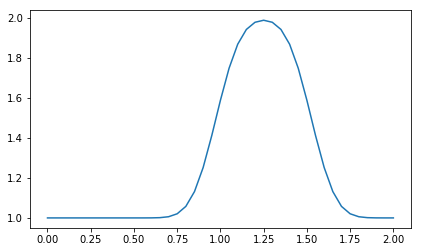

In [12]:
linear_convection(nx=41, nt=20, dt=0.025)

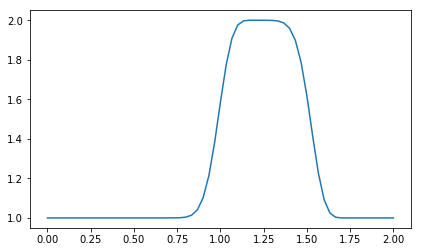

In [14]:
linear_convection(61, 20, 0.025)

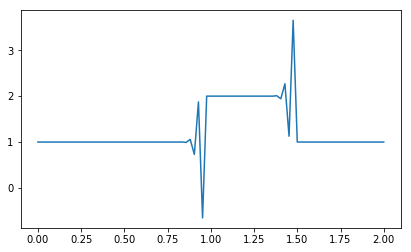

In [16]:
linear_convection(85, 20, 0.025)

Initially, an a finer mesh provides us with better results.

However, for the last example, what happened is something like this: during the time $\Delta t$ the system evolves for a gien iteration, it traveled a greater distance than $\Delta x$ - our wave is trying to get away from us!

The principle behind the condition is that, for example, if a wave is moving across a discrete spatial grid and we want to compute its amplitude at discrete time steps of equal duration, then this duration must be less than the time for the wave to travel to adjacent grid points. 

So clearly we need some relation between the timestep and the distance between grid points; such a thing is called the **courant number**
$$
\sigma = \frac{u\Delta t}{\Delta x} \le \sigma_{max}
$$

In [17]:
def cfl_linear_convection(nx=81, nt=85):
    L = 2.0
    dx = L / (nx -1)
    c = 1.0
    sigma = 0.5
    dt = sigma * dx

    u = np.ones(nx)
    u[int(0.5 / dx): int(1/dx+1)] = 2
    un = np.ones(nx)
    
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx):
            u[i] = un[i] - c *(dt/dx)*(un[i] - un[i-1])

    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_subplot(121)
    ax.plot(np.linspace(0, 2, nx), u)
    plt.show()

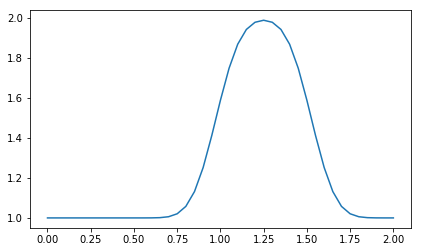

In [18]:
cfl_linear_convection(41, 20)

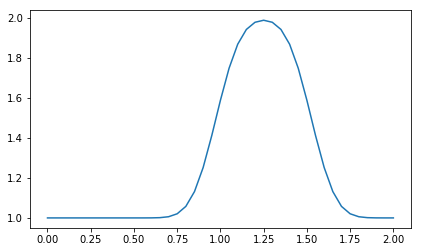

In [19]:
cfl_linear_convection(41, 20)

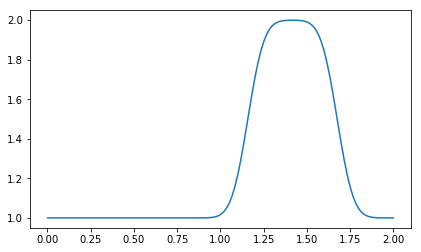

In [24]:
cfl_linear_convection(121, 80)